# Overtoner

<div class="alert alert-block alert-info">
    <b>Anbefalte forkunnskaper:</b> Pythons for-løkke.
</div>

In [1]:
# Evaluer først denne

from startscript import *

%matplotlib inline

La oss prøve noe annet morsomt: vi skal lage en kombinasjonslyd som består av en første tone, en grunntone, og deretter 5 toner som er multipler av denne grunntonen. Hvis den første tonen har frekvens $110$ så har den neste frekvens $2 \cdot 110$, den tredje har frekvens $3 \cdot 110$, den fjerde $4 \cdot 110$ og den femte $5 \cdot 110$.

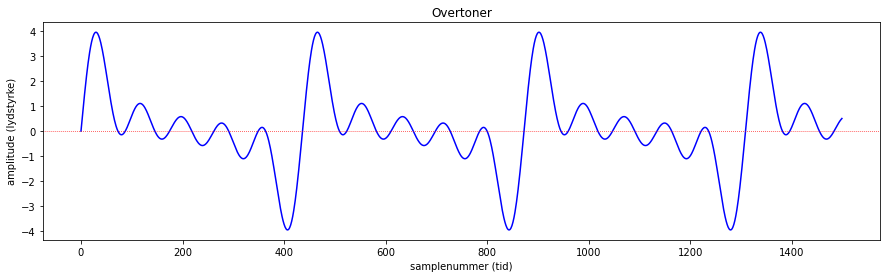

In [40]:
varighet = 3.
n = 8  # Antall toner

# Bruker her kun frekvens- og varighets-argumentet. Da får amplitude-argumentet default verdi (1.)
overtonelyd = sinus_generator(110, varighet) \
                + sinus_generator(220, varighet) \
                + sinus_generator(330, varighet) \
                + sinus_generator(440, varighet) \
                + sinus_generator(550, varighet)

spill_av(overtonelyd)


# ----------------------------------------
# Kode for å plotte graf:
antall_samples = 1500  # Antall samples som skal vises
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, overtonelyd[:antall_samples], color='blue')
title("Overtoner")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

Kanskje kjenner du igjen klangen som en dur-akkord, lik de i eksemplene over? Disse intervallene (avstandene mellom tonene) utgjør første del av det som kalles overtonerekken. På engelsk heter kalles den for _the harmonic series_, den harmoniske rekken. Overtonerekken består av alle frekvenser som er multipler av en fundamentalfrekvens.

La oss å legge til enda flere overtoner i tillegg til de fire første. For å gjøre det enklere for oss selv skal vi bruke en løkke.

Spill av lyden mens du gradvis øker $n$ mellom hver gang. Hører du den nye overtonen som legges til hver gang? Vil du si at den nye overtonen harmonerer, eller _konsonerer_ med resten av klangen? Og hva skjer med avstanden, eller intervallet, mellom hver nye overtone? Høres det ut som at intervallet blir større, holder seg likt, eller blir mindre for hver nye overtone?

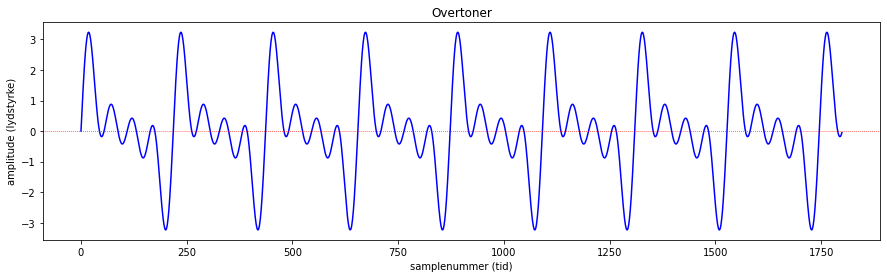

In [41]:
varighet = 3.
n = 3    # Antall overtoner
fundamentalfrekvens = 220
overtonerekken = sinus_generator(fundamentalfrekvens, varighet)  # Lager først fundamentaltonen

for i in range(2, n + 2): # Må begynne løkken på 2 siden vi allerede har fundamentaltonen (hvor i = 1)
    ny_frekvens = i * fundamentalfrekvens
    # print(i * fundamentalfrekvens)  # Kommenter inn igjen for å sjekke om frekvensene er som forventet.
    overtonerekken = overtonerekken + sinus_generator(ny_frekvens, varighet)  # Legger til nye frekvenser

spill_av(overtonerekken)



# ----------------------------------------
# Kode for å plotte graf:
antall_samples = 1800
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, overtonerekken[:antall_samples], color='blue')
title("Overtoner")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

Har du noen gang tenkt på at når man spiller den samme tonen på to instrumenter så høres de allikevel forskjellige ut? Tonen A, som vi laget med 440Hz over, høres veldig forskjellig ut på piano og gitar, selv om det er sammme tone som spilles. Hvorfor er det slik?

Når man spiller en tone på et instrument så hører man faktisk _flere_ toner samtidig! Dette er overtonene, og hvilke av overtonene som stikker seg frem er noe av det som gjør oss i stand til å skille lydene fra ulike instrumenter.

La oss variere amplituden på overtonene, slik at ikke alle overtonene er like sterke. La oss justere ned lydstyrken på halvparten av overtonene:

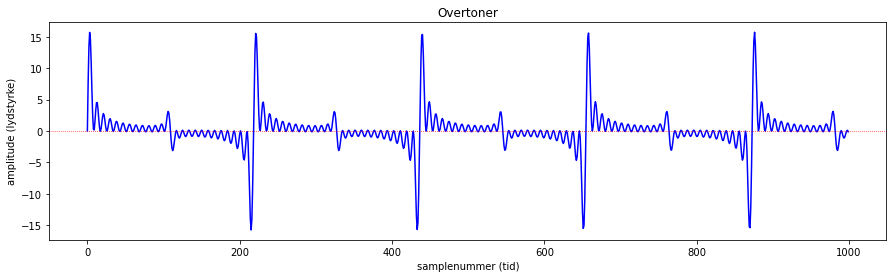

In [42]:
varighet = 3.
n = 24  # Antall overtoner
fundamentalfrekvens = 220
overtonerekken = sinus_generator(fundamentalfrekvens, varighet, 1)  # Lager først fundamentaltonen

for i in range(2, n + 2):
    ny_frekvens = i * fundamentalfrekvens
    amp = 1.
    if i % 2 == 0:  # Annenhver overtone
        # print(f"Endrer amplitude til overtonen med frekvens: {ny_frekvens}")
        amp = 0.7     # Endre faktoren her.
    overtonerekken = overtonerekken + sinus_generator(ny_frekvens, varighet, amp)  # Legger til nye frekvenser
    
spill_av(overtonerekken)


# ----------------------------------------
# Kode for å plotte graf:
antall_samples = 1000
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, overtonerekken[:antall_samples], color='blue')
title("Overtoner")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

### Prøv selv
- Gjør slik at det er den andre halvparten overtoner som får amplituden justert, altså `if i % 2 == 1:`
- For den ene halvparten overtoner (inne i if-blokken), prøv å endre faktoren i `amp = 0.7` til andre verdier. Hvordan høres det ut hvis den er større enn 1? Hva hvis den er 0?
- Gjør slik at jo høyere i overtonerekken vi kommer jo svakere blir overtonen. Hint: hva med å dele amplituden `amp` på noe som øker i størrelse for hver iterasjon, som `i`?

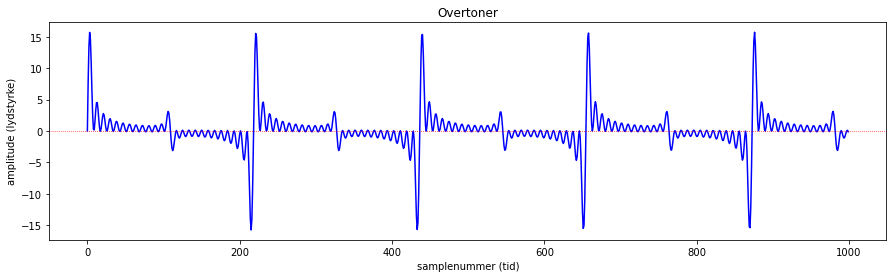

In [24]:
# Test her

varighet = 3.
n = 24  # Antall overtoner
fundamentalfrekvens = 220
overtonerekken = sinus_generator(fundamentalfrekvens, varighet, 1)  # Lager først fundamentaltonen

for i in range(2, n + 2):
    ny_frekvens = i * fundamentalfrekvens
    amp = 1.
    if i % 2 == 0:  # Annenhver overtone
        # print(f"Endrer amplitude til overtonen med frekvens: {ny_frekvens}")
        amp = 0.7     # Endre faktoren her.
    overtonerekken = overtonerekken + sinus_generator(ny_frekvens, varighet, amp)  # Legger til nye frekvenser
    
spill_av(overtonerekken)


# ----------------------------------------
# Kode for å plotte graf:
antall_samples = 1000
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, overtonerekken[:antall_samples], color='blue')
title("Overtoner")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

# Oktavene

Som du kanskje hører i overtone-eksemplene over virker det som at intervallene mellom hver nye overtone blir mindre selv om differansen i hertz er konstant mellom dem. For eksempel høres intervallet mellom 100Hz og 200Hz "større ut" enn intervallet mellom 900Hz og 1000Hz, selv om differansen i begge tilfeller er 100Hz. Det har å gjøre med hvordan øret oppfatter frekvenser. En oktav er intervallet mellom to frekvenser hvor den ene har dobbelt så høy frekvens som den andre. Oktaven under enstrøken A på $440$ Hz er altså $220$ Herz (den kalles for *lille A*).

In [43]:
varighet = 2.
enstrøken_A = sinus_generator(440, varighet)
lille_A = sinus_generator(220, varighet)

oktav = enstrøken_A + lille_A

spill_av(oktav)  # Prøv også å spille av kun enstrøken_A og kun lille_A hver for seg

Oktaven over enstrøken A er derimot ikke $440 + 220$ Hz men $440 \cdot 2 = 880$ Hz. Den kalles tostrøken A.

In [44]:
varighet = 2.
enstrøken_A = sinus_generator(440, varighet)
tostrøken_A = sinus_generator(880, varighet)

oktav = enstrøken_A + tostrøken_A

spill_av(oktav)   # Prøv også å spille av kun enstrøken_A og kun tostrøken_A hver for seg

Øret oppfatter altså avstanden mellom 220Hz og 440Hz som likt avstanden mellom 440Hz og 880Hz. Begge deler klinger som en oktav selv om frekvensdifferansen ikke er like. Og intervallet mellom 8000Hz og 16000Hz høres likt ut som det mellom 100Hz og 200Hz! (hvor det ene intervallet naturligvis ligger veldig lyst, mens det er andre ligger ganske mørkt). Det er fordi øret oppfatter lyd ikke lineært men logaritmisk.

La oss se på hvordan grafen endrer seg i overgangen mellom to toner, altså når vi endrer frekvensen:

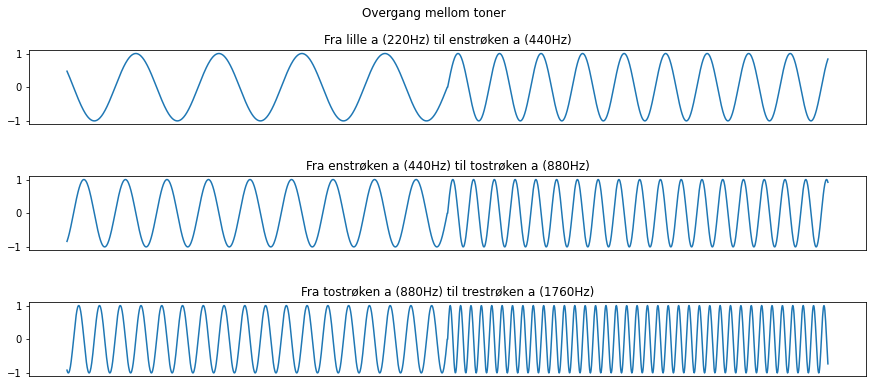

In [45]:
v = 2  # Varighet

melodi = lag_melodi([
    sinus_generator(220, v),   # lille a
    sinus_generator(440, v),   # enstrøken a
    sinus_generator(880, v),   # tostrøken a
    sinus_generator(1760, v),  # trestrøken a
    sinus_generator(880, v),   # tostrøken a
    sinus_generator(440, v),   # enstrøken a
    sinus_generator(220, v),   # lille a
])

spill_av(melodi)



# ----------------------------------------
# Kode for å plotte grafene (ikke nødvendig å forstå denne)
start1 = int(rate * v) - 1000
slutt1 = start1 + 2000
start2 = int(rate * v * 2) - 1000
slutt2 = start2 + 2000
start3 = int(rate * v * 3) - 1000
slutt3 = start3 + 2000

fig, axs = subplots(3)

fig.suptitle("Overgang mellom toner")
fig.set_figwidth(15)
fig.set_figheight(6)

subplots_adjust(hspace=0.7)

x1 = arange(start1, slutt1)
x2 = arange(start2, slutt2)
x3 = arange(start3, slutt3)

axs[0].set_title("Fra lille a (220Hz) til enstrøken a (440Hz)")
axs[1].set_title("Fra enstrøken a (440Hz) til tostrøken a (880Hz)")
axs[2].set_title("Fra tostrøken a (880Hz) til trestrøken a (1760Hz)")
axs[0].plot(x1, melodi[start1:slutt1])
axs[1].plot(x2, melodi[start2:slutt2])
axs[2].plot(x3, melodi[start3:slutt3])
[g.xaxis.set_visible(False) for g in axs]

show()

Her ser du hvordan frekvensen endrer seg når vi skifter tone med en oktav. Antallet svingninger dobler seg for hver oktav.